## <a id='0'>Index</a>
|.|.|.|
|:--|:--|:--|
|[1) Heuristic Forecasting Methods](#1)|[2.2) Double Exponential Smoothing](#9)|[5.4) SARIMA](#17)|
|[1.1) Naive Forecast](#2)|[2.3) Tripple Exponential Smoothing](#10)|[6) Granger's Causality](#18)|
|[1.2) Naive Seasonal](#3)|[3) Stationarity Test](#11)|[7) VAR](#19)|
|[1.3) Average Forecasting](#4)|[4) ACF & PACF](#12)|[8) ARCH](#20)|
|[1.4) Drift Method](#5)|[5) Auto regressive methods](#13)|[9) GARCH](#21)|
|[1.5) Simple Moving Average](#6)|[5.1) AR](#14)|[10) Partial F-test](#22)|
|[2) Exponential Smoothing Methods](#7)|[5.2) ARMA](#15)|[11) Reconstructing TS after differencing](#23) |
|[2.1) Simple Exponential Smoothing](#8)|[5.3) ARIMA](#16)| |

In [1]:
# import libraries
import numpy as np
import pandas as pd
from datetime import datetime
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error 
from math import sqrt 
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.stattools import acf as ACF
from statsmodels.tsa.stattools import pacf as PACF
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa import arima
from statsmodels.graphics.tsaplots import acf, pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
# for auto arima
from pmdarima import auto_arima 
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
import statsmodels.tsa.stattools as ts
from arch import arch_model
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
#function to convert date into DateTime format
def parser(s):
    return datetime.strptime(s, '%d-%m-%Y')

In [3]:
#read data
df = pd.read_csv('datasets/co2.csv', parse_dates=[0], index_col=0, date_parser=parser)
train = df.iloc[0:312]
test = df.iloc[312:]
y_hat = test.copy()
df.head()

,CO2
1959-01-31,315.58
1959-02-28,316.39
1959-03-31,316.79
1959-04-30,317.82
1959-05-31,318.39


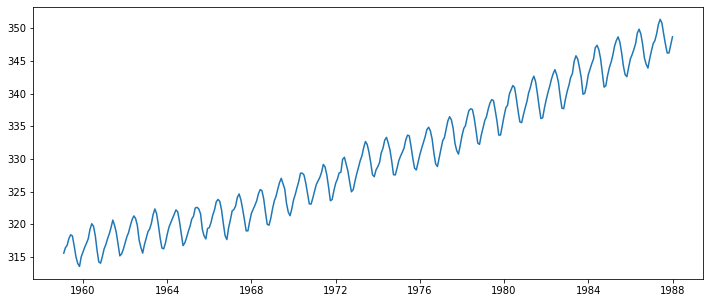

In [4]:
# plot the full series
plt.figure(figsize=(12,5))
plt.plot(df['CO2'], label='CO2')
plt.show()

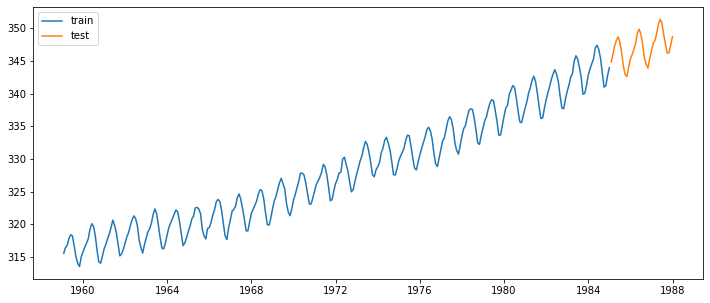

In [5]:
# plot the splits as train and test
plt.figure(figsize=(12,5))
plt.plot(train['CO2'], label='train')
plt.plot(test['CO2'], label='test')
plt.legend(loc='best')
plt.show()

## <a id='1' style="font-size: 28px">1) Heuristic Forecasting Methods </a>

<a id='2' style="font-size: 28px">1.1) Naive Forecast</a>

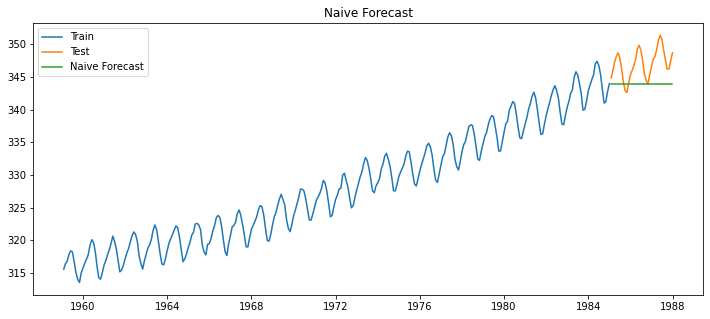

In [6]:
d = np.asarray(train.CO2)
y_hat['Naive'] = d[len(d)-1]
plt.figure(figsize=(12,5))
plt.plot(train.index, train['CO2'], label='Train')
plt.plot(test.index,test['CO2'], label='Test')
plt.plot(y_hat.index,y_hat['Naive'], label='Naive Forecast')
plt.title("Naive Forecast")
plt.legend()
plt.show()

In [7]:
rmse1 = sqrt(mean_squared_error(test.CO2, y_hat.Naive))
rmse1

3.7373092667794703

[Go to Index](#0)

<a id='3' style="font-size: 28px">1.2) Naive Seasonal</a>

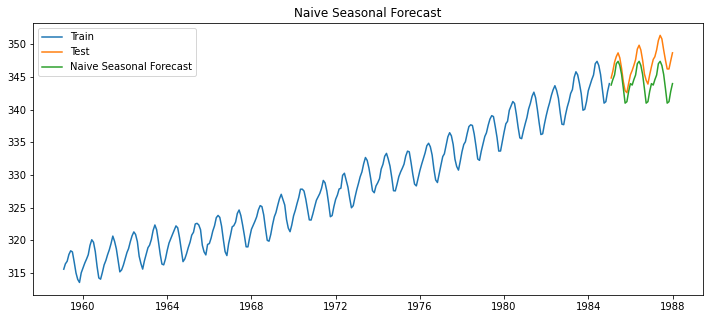

In [8]:
d = np.asarray(train.CO2)
d1 = []
for i in range(12):
    d1.append(d[len(d)-(12-i)])
y_hat['naive_seasonal'] = d1*3
plt.figure(figsize=(12,5))
plt.plot(train.index, train['CO2'], label='Train')
plt.plot(test.index,test['CO2'], label='Test')
plt.plot(y_hat.index,y_hat['naive_seasonal'], label='Naive Seasonal Forecast')
plt.legend(loc='best')
plt.title("Naive Seasonal Forecast")
plt.show()

In [9]:
rmse2 = sqrt(mean_squared_error(test.CO2, y_hat.naive_seasonal))
rmse2

2.9460826155723803

[Go to Index](#0)

<a id='4' style="font-size: 28px">1.3) Average Forecasting</a>

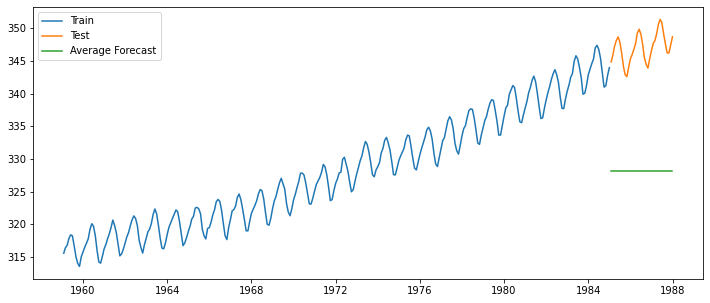

In [10]:
y_hat['avg_forecast'] = train['CO2'].mean()
plt.figure(figsize=(12,5))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='Test')
plt.plot(y_hat['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [11]:
rmse3 = sqrt(mean_squared_error(test.CO2, y_hat.avg_forecast))
rmse3

18.951377100954424

[Go to Index](#0)

<a id='5' style="font-size: 28px">1.4) Drift Method</a>

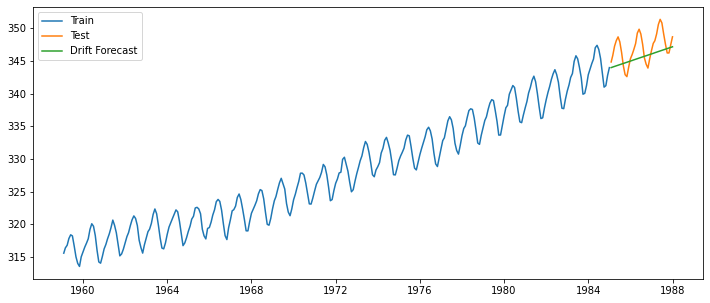

In [12]:
y_t = train.iloc[len(train)-1]['CO2'] 
m = (y_t - train.iloc[0]['CO2']) / len(train)
h = np.linspace(0,len(y_hat)-1, len(y_hat))
y_hat['drift_forecast'] = y_t + m * h

plt.figure(figsize=(12,5))
plt.plot( train['CO2'], label='Train')
plt.plot( test['CO2'], label='Test')
plt.plot( y_hat['drift_forecast'], 
        label='Drift Forecast')
plt.legend(loc='best')
plt.show()

In [13]:
rmse4 = sqrt(mean_squared_error(test.CO2, y_hat.drift_forecast))
rmse4

2.471700730582393

[Go to Index](#0)

<a id='6' style="font-size: 28px">1.5) Simple Moving Average</a>

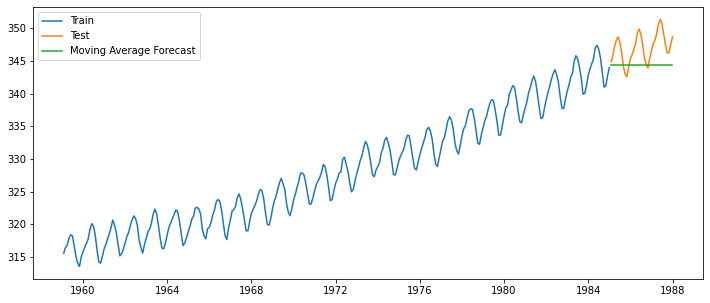

In [14]:
y_hat['moving_avg_forecast'] = train['CO2'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(12,5))
plt.plot(train['CO2'], label='Train')
plt.plot(test['CO2'], label='Test')
plt.plot(y_hat['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

[Go to Index](#0)

In [15]:
rmse5 = sqrt(mean_squared_error(test.CO2, y_hat.moving_avg_forecast))
rmse5

3.432406698038697

In [16]:
y_hat.head()

,CO2,Naive,naive_seasonal,avg_forecast,drift_forecast,moving_avg_forecast
1985-01-31,344.82,343.96,343.74,328.176282,343.960000,344.343333
1985-02-28,345.82,343.96,344.55,328.176282,344.050962,344.343333
1985-03-31,347.24,343.96,345.28,328.176282,344.141923,344.343333
1985-04-30,348.09,343.96,347.00,328.176282,344.232885,344.343333
1985-05-31,348.66,343.96,347.37,328.176282,344.323846,344.343333


In [17]:
pd.DataFrame({"Naive":rmse1,"Naive Seasonal":rmse2,"Average Forecast":rmse3,"Drift":rmse4,"Moving Average":rmse5}, index=["RMSE"])

,Naive,Naive Seasonal,Average Forecast,Drift,Moving Average
RMSE,3.737309,2.946083,18.951377,2.471701,3.432407


## <a id='7' style="font-size: 28px">2) Exponential Smoothing Methods</a>

In [18]:
train = df.iloc[0:314]
test = df.iloc[314:]

<a id='8' style="font-size: 28px">2.1) Simple Exponential Smoothing</a>

In [19]:
# fit a SES without specifying smooth parameter, so library does it for us
fitx = SimpleExpSmoothing(np.asarray(train['CO2'])).fit(optimized=True)
print('optimal alpha chosen:', fitx.model.params['smoothing_level'])

optimal alpha chosen: 0.9999999850988377


In [20]:
fit2 = SimpleExpSmoothing(np.asarray(train['CO2'])).fit(smoothing_level=0.4, optimized=False)

In [21]:
# print the rmse of training step
rms_train_opt = sqrt(mean_squared_error(train['CO2'], fitx.fittedvalues)) 
print('rmse for fitted values with optimal alpha: ', rms_train_opt)
rms_train = sqrt(mean_squared_error(train['CO2'], fit2.fittedvalues)) 
print('rmse for fitted values with supplied alpha: ', rms_train)

rmse for fitted values with optimal alpha:  1.1643015578152753
rmse for fitted values with supplied alpha:  1.8731260883975775


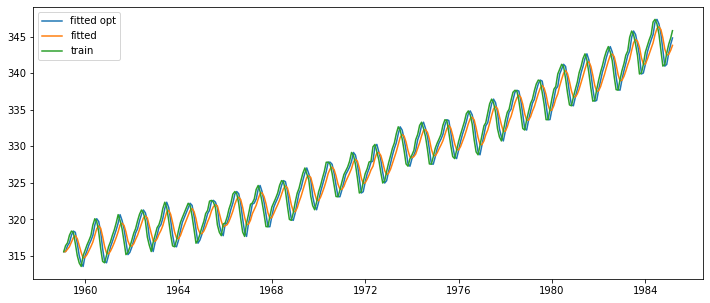

In [22]:
# plot training data against fitted values using both models
plt.figure(figsize=(12,5))
plt.plot(train.index, fitx.fittedvalues, label = 'fitted opt')
plt.plot(train.index, fit2.fittedvalues, label = 'fitted')
plt.plot(train['CO2'], label='train')
plt.legend(loc='best')
plt.show()

In [23]:
y_hat = test.copy()
# forecast using both models
y_hat['SES_opt_fcast'] = fitx.forecast(len(y_hat))
y_hat['SES_fcast'] = fit2.forecast(len(y_hat))

# display forecasted values
y_hat.head()

,CO2,SES_opt_fcast,SES_fcast
1985-03-31,347.24,345.82,344.612417
1985-04-30,348.09,345.82,344.612417
1985-05-31,348.66,345.82,344.612417
1985-06-30,347.90,345.82,344.612417
1985-07-31,346.27,345.82,344.612417


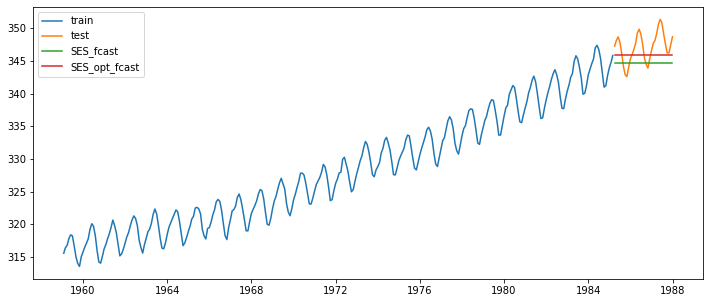

In [24]:
# plot the time series as train, test and forecasted
plt.figure(figsize=(12,5))
plt.plot(train['CO2'], label='train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat['SES_fcast'], label='SES_fcast')
plt.plot(y_hat['SES_opt_fcast'], label='SES_opt_fcast')
plt.legend(loc='best')
plt.show()

In [25]:
# calculate RMSE of the forecast on test data
rms = sqrt(mean_squared_error(test.CO2, y_hat.SES_fcast)) 
print('rmse for model with supplied alpha: ', rms)
rmse_SES = sqrt(mean_squared_error(test.CO2, y_hat.SES_opt_fcast)) 
print('rmse for model with optimal alpha: ', rmse_SES)

rmse for model with supplied alpha:  3.3153237732255763
rmse for model with optimal alpha:  2.537071617268527


[Go to Index](#0)

<a id='9' style="font-size: 28px">2.2) Double Exponential Smoothing</a>

In [26]:
# using Holt's linear model predict for test set
y_hat = test.copy()
fit = Holt(np.asanyarray(train['CO2'])).fit(smoothing_level=0.4, smoothing_slope=0.2, optimized=True)
y_hat['Holt_linear'] = fit.forecast(len(test))

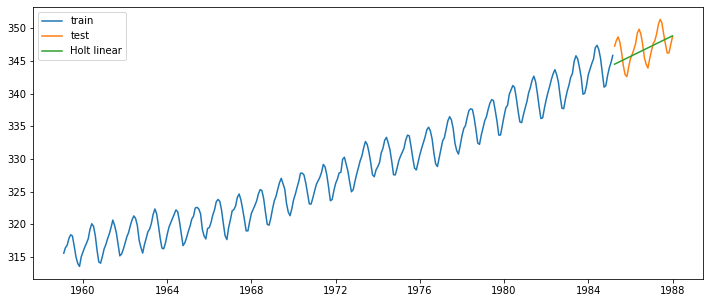

In [27]:
# plot the forecast
plt.figure(figsize=(12,5))
plt.plot(train['CO2'], label='train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.legend(loc='best')
plt.show()

In [28]:
# compute the error
rmse=sqrt(mean_squared_error(test.CO2, y_hat['Holt_linear']))
print(rmse)

2.165033369352927


In [29]:
# same as above, now using the ExponentialSmoothing library
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['CO2']), trend='add', seasonal=None)
fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.2, optimized=True)
y_hat['DES'] = fit1.forecast(len(test))

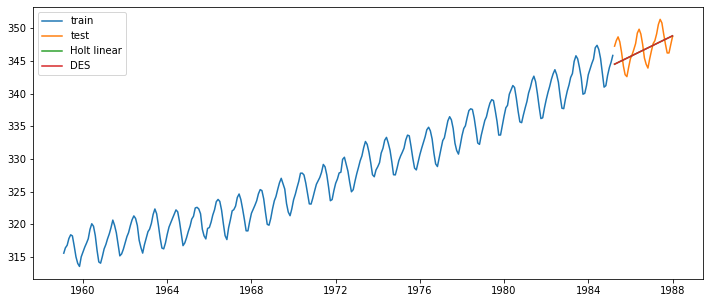

In [30]:
plt.figure(figsize=(12,5))
plt.plot(train['CO2'], label='train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.plot(y_hat['DES'], label='DES')
plt.legend(loc='best')
plt.show()

In [31]:
rmse_DES=sqrt(mean_squared_error(test.CO2, y_hat['DES']))
print(rmse_DES)

2.165033369352927


[Go to Index](#0)

<a id='10' style="font-size: 28px">2.3) Tripple Exponential Smoothing</a>

In [32]:
# Using ExponentialSmoothing
# this is based on Real Statistics worksheet "Holt-Winters 4a"
model = ExponentialSmoothing(np.asarray(train['CO2']), seasonal_periods=12, trend='add', seasonal='mul')
fit1 = model.fit(smoothing_level=0.126, smoothing_slope=0.155, smoothing_seasonal=1, optimized=False)
fit2 = model.fit(optimized=True)
y_hat['TES_add_mul'] = fit1.forecast(len(test))
y_hat["TES"] = fit2.forecast(len(test))

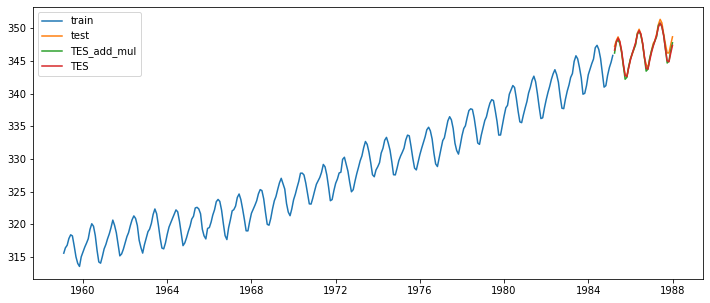

In [33]:
plt.figure(figsize=(12,5))
plt.plot(train['CO2'], label='train')
plt.plot(test['CO2'], label='test')
plt.plot(y_hat['TES_add_mul'], label='TES_add_mul')
plt.plot(y_hat['TES'], label='TES')
plt.legend(loc='best')
plt.show()

In [34]:
rmse_TES_add_mul=sqrt(mean_squared_error(test.CO2, y_hat['TES_add_mul']))
print(rmse_TES_add_mul)

0.5531499348736226


In [35]:
rmse_TES=sqrt(mean_squared_error(test.CO2, y_hat['TES']))
print(rmse_TES)

0.5390639415624909


In [36]:
y_hat.head()

,CO2,Holt_linear,DES,TES_add_mul,TES
1985-03-31,347.24,344.483888,344.483888,346.183899,346.628252
1985-04-30,348.09,344.615218,344.615218,347.860323,347.857130
1985-05-31,348.66,344.746548,344.746548,348.227650,348.485030
1985-06-30,347.90,344.877878,344.877878,347.663331,347.978035
1985-07-31,346.27,345.009209,345.009209,346.361837,346.578531


In [37]:
pd.DataFrame({"SES":rmse_SES,"DES":rmse_DES,"TES":rmse_TES}, index=["RMSE"])

,SES,DES,TES
RMSE,2.537072,2.165033,0.539064


[Go to Index](#0)

<a id='11' style="font-size: 28px">3) Stationarity Test</a>

A category of tests called ‘Unit Root Test’, is the proper method for testing the stationarity of a time series. Dickey Fuller unit root test is sufficient for AR(1) model with white noise error but for more complex model Augmented Dickey Fuller test is used.

In [38]:
def parser2(s):
    return datetime.strptime(s, '%Y-%m')

In [39]:
df = pd.read_csv('datasets/airline-passengers.csv', parse_dates=[0], index_col=0, date_parser=parser2)
# explore dataset
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


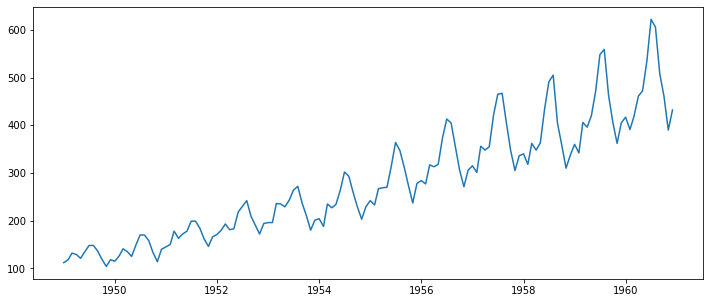

In [40]:
# create a series with just the passenger count
y = df['Passengers']
# plot
plt.figure(figsize=(12,5))
plt.plot(y)
plt.show()

In [41]:
# Stationarity Test or ADF test
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


If p-value of ADF test is >0.05, then null hypothesis can not be rejected. Which means that the time series is not stationary and hence we need to do differencing of the time series.

In [42]:
# Seasonal differenceing once
d = 12                                      #Elements in a season which needs to be differenced
df["Diff1"] = df["Passengers"].diff(d)      #12 months season
diff_values = df["Diff1"].values
y_diff = diff_values[~np.isnan(diff_values)]
y = y_diff
df.head(20)

,Passengers,Diff1
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


<a id='23' style="font-size: 28px">11) Reconstructing time series after differencing</a>

In [43]:
# Reconstructing time series after differencing
df["Reconstructed"] = df["Passengers"][:d]
arr = np.array(df["Passengers"][:-d])
df["Reconstructed"][d:] = arr + df["Diff1"][d:]
df.tail(20)

,Passengers,Diff1,Reconstructed
Month,,,
1959-05-01,420,57.0,420.0
1959-06-01,472,37.0,472.0
1959-07-01,548,57.0,548.0
1959-08-01,559,54.0,559.0
1959-09-01,463,59.0,463.0
1959-10-01,407,48.0,407.0
1959-11-01,362,52.0,362.0
1959-12-01,405,68.0,405.0
1960-01-01,417,57.0,417.0


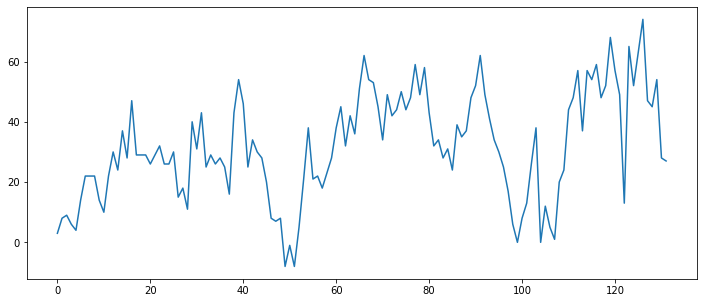

In [44]:
plt.figure(figsize=(12,5))
plt.plot(y)
plt.show()

In [45]:
# Stationarity Test
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.383021
p-value: 0.011551
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


[Go to Index](#0)

<a id='12' style="font-size: 28px">4) ACF & PACF</a>

In [46]:
ACF(df["Passengers"],adjusted=False,nlags=5)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997])

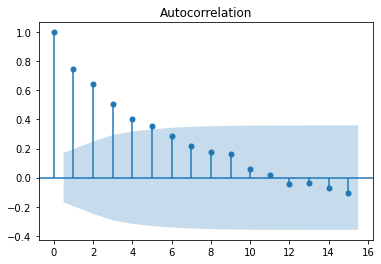

In [47]:
plot_acf(np.array(df["Diff1"][~np.isnan(df["Diff1"])]), lags=15, alpha=0.05)
plt.show()

In [48]:
PACF(df["Diff1"][~np.isnan(df["Diff1"])],method='ols',nlags=5)

array([ 1.        ,  0.74685449,  0.21180056, -0.07845363, -0.00503377,
        0.10169211])

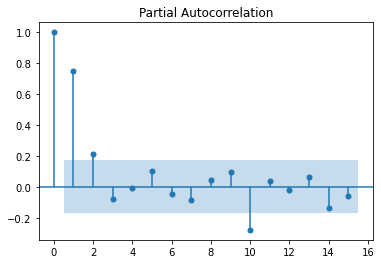

In [49]:
plot_pacf(np.array(df["Diff1"][~np.isnan(df["Diff1"])]), lags=15, method='ols')
plt.show()

[Go to Index](#0)

## <a id='13' style="font-size: 28px">5) Auto regressive methods</a>

<a id='14' style="font-size: 28px">5.1) AR</a>

In [50]:
train_AR = df[0:121]
test_AR = df[121:]
#AR model fitting
model = AutoReg(train_AR.Diff1.dropna(),lags=3) #Taking lags equal to 3 from PACF plot
AR = model.fit()
print(AR.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Diff1   No. Observations:                  109
Model:                     AutoReg(3)   Log Likelihood                -392.565
Method:               Conditional MLE   S.D. of innovations              9.821
Date:                Tue, 01 Mar 2022   AIC                              4.663
Time:                        12:16:14   BIC                              4.789
Sample:                    04-01-1950   HQIC                             4.714
                         - 01-01-1959                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.3633      2.130      2.988      0.003       2.189      10.537
Diff1.L1       0.6736      0.097      6.925      0.000       0.483       0.864
Diff1.L2       0.2248      0.116      1.932      0.0

In [51]:
start=len(train_AR) - 12             # test start value minus 12 because we have done seasonal differencing of 12 months
end=len(train_AR)+len(test_AR) - 13  # test end value 
pred= AR.predict(start=start, end=end, dynamic=False) # Predicting on test data.
# Obtained the predictions on test data

In [52]:
pred_df = pd.DataFrame(pred, columns = ['Pred_Diff_AR'])
pred_df.head()

,Pred_Diff_AR
1959-02-01,19.476032
1959-03-01,23.860984
1959-04-01,24.476115
1959-05-01,25.937266
1959-06-01,26.547228


In [53]:
train_AR["Passengers"][-12:]

Month
1958-02-01    318
1958-03-01    362
1958-04-01    348
1958-05-01    363
1958-06-01    435
1958-07-01    491
1958-08-01    505
1958-09-01    404
1958-10-01    359
1958-11-01    310
1958-12-01    337
1959-01-01    360
Name: Passengers, dtype: int64

In [54]:
test_AR.head()

,Passengers,Diff1,Reconstructed
Month,,,
1959-02-01,342,24.0,342.0
1959-03-01,406,44.0,406.0
1959-04-01,396,48.0,396.0
1959-05-01,420,57.0,420.0
1959-06-01,472,37.0,472.0


In [55]:
pred_df[["Last_year","Prediction_AR"]] = 0
pred_df["Last_year"][:12] = np.array(train_AR["Passengers"][-12:])
pred_df["Prediction_AR"][:12] = pred_df["Last_year"][:12] + pred_df["Pred_Diff_AR"][:12]
pred_df["Prediction_AR"][12:] = np.array(pred_df["Prediction_AR"][:-12]) + pred_df["Pred_Diff_AR"][12:]
pred_df.head()

,Pred_Diff_AR,Last_year,Prediction_AR
1959-02-01,19.476032,318,337.476032
1959-03-01,23.860984,362,385.860984
1959-04-01,24.476115,348,372.476115
1959-05-01,25.937266,363,388.937266
1959-06-01,26.547228,435,461.547228


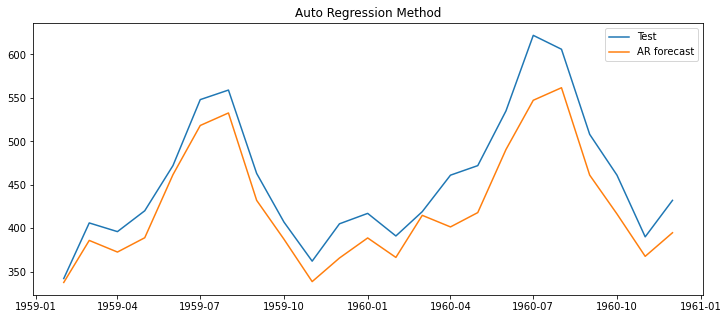

In [56]:
#plotting predicted values
plt.figure(figsize=(12,5))
plt.plot(test_AR['Passengers'], label='Test')
plt.plot(pred_df["Prediction_AR"], label='AR forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [57]:
rmse=sqrt(mean_squared_error(test_AR['Passengers'], pred_df["Prediction_AR"]))
print(rmse)

36.484461279658454


In [58]:
pred_df["Residuals_AR"] = test_AR['Passengers'] - pred_df["Prediction_AR"]

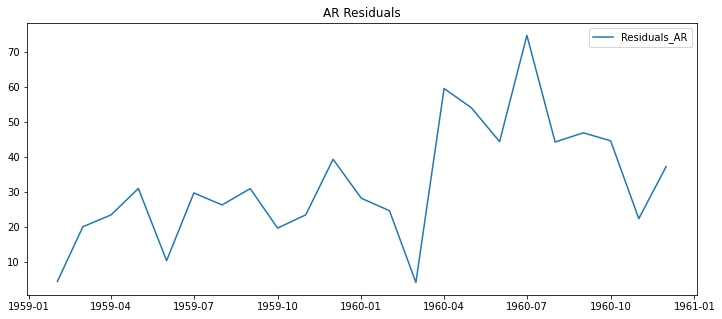

In [59]:
plt.figure(figsize=(12,5))
plt.plot(pred_df["Residuals_AR"], label='Residuals_AR')
plt.legend(loc='best')
plt.title('AR Residuals')
plt.show()

[Go to Index](#0)

<a id='15' style="font-size: 28px">5.2) ARMA</a>

Time Series must be made stationary before fitting ARMA model.

<Figure size 864x360 with 0 Axes>

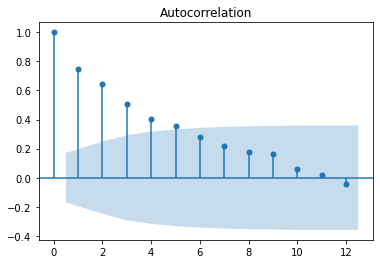

In [60]:
plt.figure(figsize=(12,5))
plot_acf(np.array(df["Diff1"][~np.isnan(df["Diff1"])]), lags=12, alpha=0.05)
plt.show()

<Figure size 864x360 with 0 Axes>

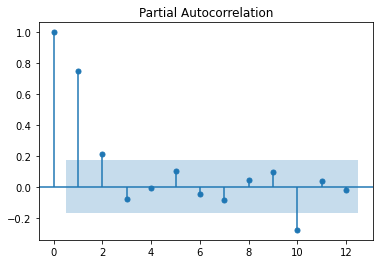

In [61]:
plt.figure(figsize=(12,5))
plot_pacf(np.array(df["Diff1"][~np.isnan(df["Diff1"])]), lags=12, method='ols')
plt.show()

In [62]:
# Train the model
model = ARMA(np.array(train_AR.Diff1.dropna()), order=(2, 5))
results = model.fit()
predictions = results.forecast(steps=len(test_AR))

In [63]:
pred_df["Pred_Diff_ARMA"] = predictions[0]
pred_df["Prediction_ARMA"] = 0
pred_df["Prediction_ARMA"][:12] = pred_df["Last_year"][:12] + pred_df["Pred_Diff_ARMA"][:12]
pred_df["Prediction_ARMA"][12:] = np.array(pred_df["Prediction_ARMA"][:-12]) + pred_df["Pred_Diff_ARMA"][12:]
pred_df.head()

,Pred_Diff_AR,Last_year,Prediction_AR,Residuals_AR,Pred_Diff_ARMA,Prediction_ARMA
1959-02-01,19.476032,318,337.476032,4.523968,13.391245,331.391245
1959-03-01,23.860984,362,385.860984,20.139016,18.467225,380.467225
1959-04-01,24.476115,348,372.476115,23.523885,20.010599,368.010599
1959-05-01,25.937266,363,388.937266,31.062734,18.901473,381.901473
1959-06-01,26.547228,435,461.547228,10.452772,21.423841,456.423841


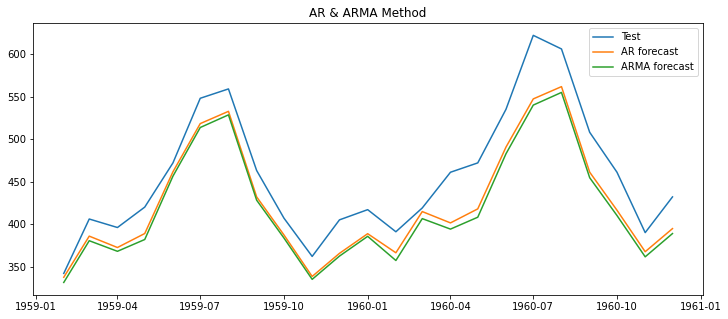

In [64]:
#plotting predicted values
plt.figure(figsize=(12,5))
plt.plot(test_AR['Passengers'], label='Test')
plt.plot(pred_df["Prediction_AR"], label='AR forecast')
plt.plot(pred_df["Prediction_ARMA"], label='ARMA forecast')
plt.legend(loc='best')
plt.title('AR & ARMA Method')
plt.show()

In [65]:
rmse=sqrt(mean_squared_error(test_AR['Passengers'], pred_df["Prediction_ARMA"]))
print(rmse)

42.060099809188


In [66]:
pred_df["Residuals_ARMA"] = test_AR['Passengers'] - pred_df["Prediction_ARMA"]

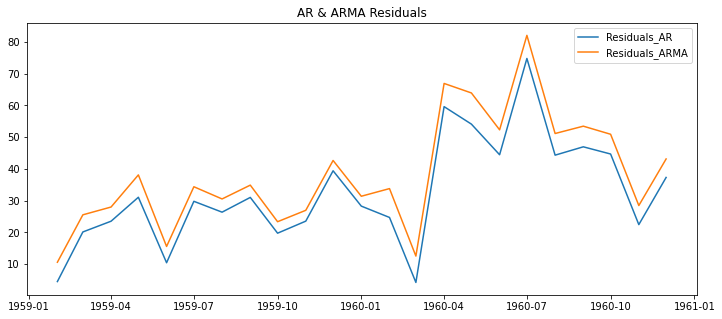

In [67]:
plt.figure(figsize=(12,5))
plt.plot(pred_df["Residuals_AR"], label='Residuals_AR')
plt.plot(pred_df["Residuals_ARMA"], label='Residuals_ARMA')
plt.legend(loc='best')
plt.title('AR & ARMA Residuals')
plt.show()

[Go to Index](#0)

<a id='16' style="font-size: 28px">5.3) ARIMA </a>

Time Series must be made stationary before fitting ARIMA model. We have already made data stationary in earlier steps.

In [68]:
# grid search and find best parameters
stepwise_fit = auto_arima(np.array(train_AR.Passengers.dropna()), start_p = 0, 
                          start_q = 0,	max_p = 4, max_q = 6, 
                          d = 1, trace = True, 
                          error_action ='ignore', 
                          # we don't want to know if an order does not work 
                          suppress_warnings = True, 
                          # we don't want convergence warnings
                          information_criterion='aic',
                          stepwise = True)# set to stepwise 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1149.378, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1141.051, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1137.123, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1148.003, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1135.572, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1137.006, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1136.747, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1095.623, Time=0.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 A

In [69]:
# To print the summary 
stepwise_fit.summary() 
# use the recommended fit
model = arima.model.ARIMA(np.array(train_AR.Passengers.dropna()), order=(2,1,2), seasonal_order=(0,0,0,0))
model_fitted = model.fit()
model_fitted.params
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  121
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -546.057
Date:                Tue, 01 Mar 2022   AIC                           1102.115
Time:                        12:16:25   BIC                           1116.052
Sample:                             0   HQIC                          1107.775
                                - 121                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6527      0.030     54.902      0.000       1.594       1.712
ar.L2         -0.9005      0.027    -33.575      0.000      -0.953      -0.848
ma.L1         -1.8997      1.838     -1.033      0.301      -5.503       1.704
ma.L2          0.9996      1.935      0.516      0.606      -2.794       4.793
sigma2       491.6823    945.811      0.520      0.603   -1362.072    2345.437
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.31   Prob(JB):                         0.96
Heteroskedasticity (H):               6.00   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

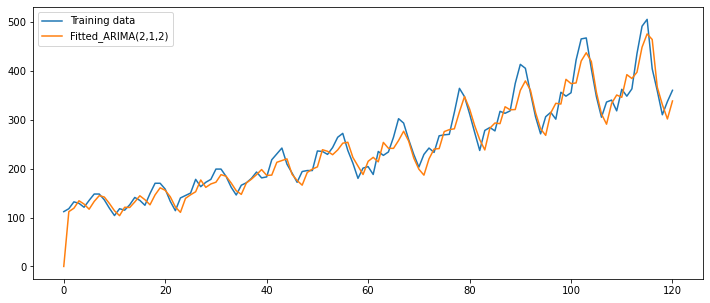

In [70]:
# plot train, test, in sample fitted values and out of sample forecast
plt.figure(figsize=(12,5))
plt.plot(np.array(train_AR.Passengers.dropna()), label='Training data')
plt.plot(model_fitted.fittedvalues, label='Fitted_ARIMA(2,1,2)')
plt.legend()
plt.show()

In [71]:
pred_df["Prediction_ARIMA"] = model_fitted.forecast(steps=len(test_AR))
pred_df.head()

,Pred_Diff_AR,Last_year,Prediction_AR,Residuals_AR,Pred_Diff_ARMA,Prediction_ARMA,Residuals_ARMA,Prediction_ARIMA
1959-02-01,19.476032,318,337.476032,4.523968,13.391245,331.391245,10.608755,367.621656
1959-03-01,23.860984,362,385.860984,20.139016,18.467225,380.467225,25.532775,380.959842
1959-04-01,24.476115,348,372.476115,23.523885,20.010599,368.010599,27.989401,396.140923
1959-05-01,25.937266,363,388.937266,31.062734,18.901473,381.901473,38.098527,409.220153
1959-06-01,26.547228,435,461.547228,10.452772,21.423841,456.423841,15.576159,417.166120


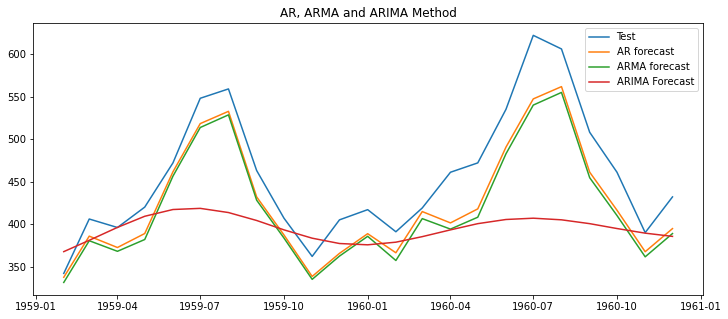

In [72]:
plt.figure(figsize=(12,5))
plt.plot(test_AR['Passengers'], label='Test')
plt.plot(pred_df["Prediction_AR"], label='AR forecast')
plt.plot(pred_df["Prediction_ARMA"], label='ARMA forecast')
plt.plot(pred_df["Prediction_ARIMA"], label='ARIMA Forecast')
plt.legend(loc='best')
plt.title('AR, ARMA and ARIMA Method')
plt.show()

In [73]:
rmse=sqrt(mean_squared_error(test_AR['Passengers'], pred_df["Prediction_ARIMA"]))
print(rmse)

88.80503219514496


In [74]:
pred_df["Residuals_ARIMA"] = test_AR['Passengers'] - pred_df["Prediction_ARIMA"]

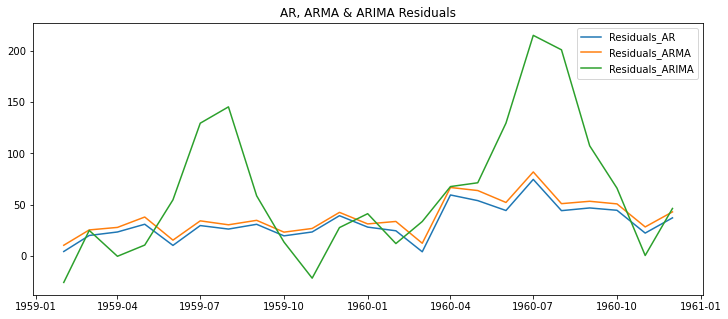

In [75]:
plt.figure(figsize=(12,5))
plt.plot(pred_df["Residuals_AR"], label='Residuals_AR')
plt.plot(pred_df["Residuals_ARMA"], label='Residuals_ARMA')
plt.plot(pred_df["Residuals_ARIMA"], label='Residuals_ARIMA')
plt.legend(loc='best')
plt.title('AR, ARMA & ARIMA Residuals')
plt.show()

[Go to Index](#0)

<a id='17' style="font-size: 28px">5.4) SARIMA </a>

In [76]:
# grid search and find best parameters
stepwise_fit = auto_arima(np.array(train_AR.Passengers.dropna()), start_p = 0, 
                          start_q = 0,	max_p = 4, max_q = 3, 
                          m = 12, start_P = 0, max_P = 3,seasonal = True,
                          start_Q = 0, max_Q = 3,d = 1, D = 0, trace = True, 
                          error_action ='ignore', 
                          # we don't want to know if an order does not work 
                          suppress_warnings = True, 
                          # we don't want convergence warnings
                          information_criterion='aic',
                          stepwise = True)# set to stepwise 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1149.378, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1056.463, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1148.003, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1137.123, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=936.994, Time=0.58 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=935.305, Time=0.43 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=936.916, Time=0.93 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=936.812, Time=0.50 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=937.293, Time=0.46 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=933.325, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=11

In [77]:
# To print the summary 
stepwise_fit.summary() 
# use the recommended fit
model = arima.model.ARIMA(np.array(train_AR.Passengers.dropna()), order=(1,1,1), seasonal_order=(1,0,0,12))
model_fitted = model.fit()
model_fitted.params
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  121
Model:             ARIMA(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                -460.559
Date:                           Tue, 01 Mar 2022   AIC                            929.118
Time:                                   12:16:45   BIC                            940.268
Sample:                                        0   HQIC                           933.646
                                           - 121                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7704      0.095      8.094      0.000       0.584       0.957
ma.L1         -0.9503      0.048    -19.804      0.000      -1.044      -0.856
ar.S.L12       0.9506      0.028     34.334      0.000       0.896       1.005
sigma2       100.5406     12.501      8.043      0.000      76.039     125.042
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 8.43
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               2.70   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

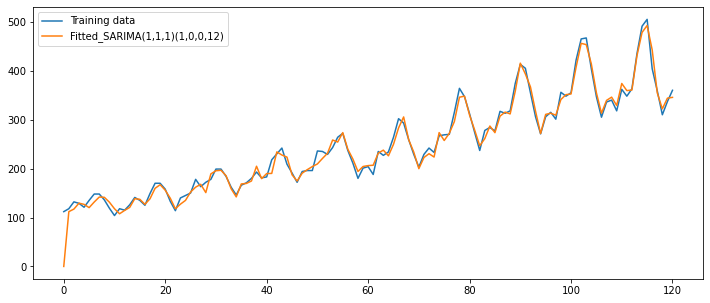

In [78]:
# plot train, test, in sample fitted values and out of sample forecast
plt.figure(figsize=(12,5))
plt.plot(np.array(train_AR.Passengers.dropna()), label='Training data')
plt.plot(model_fitted.fittedvalues, label='Fitted_SARIMA(1,1,1)(1,0,0,12)')
plt.legend()
plt.show()

In [79]:
pred_df["Prediction_SARIMA"] = model_fitted.forecast(steps=len(test_AR))
pred_df.head()

,Pred_Diff_AR,Last_year,Prediction_AR,Residuals_AR,Pred_Diff_ARMA,Prediction_ARMA,Residuals_ARMA,Prediction_ARIMA,Residuals_ARIMA,Prediction_SARIMA
1959-02-01,19.476032,318,337.476032,4.523968,13.391245,331.391245,10.608755,367.621656,-25.621656,340.124589
1959-03-01,23.860984,362,385.860984,20.139016,18.467225,380.467225,25.532775,380.959842,25.040158,382.748449
1959-04-01,24.476115,348,372.476115,23.523885,20.010599,368.010599,27.989401,396.140923,-0.140923,370.056088
1959-05-01,25.937266,363,388.937266,31.062734,18.901473,381.901473,38.098527,409.220153,10.779847,384.788822
1959-06-01,26.547228,435,461.547228,10.452772,21.423841,456.423841,15.576159,417.166120,54.833880,453.594931


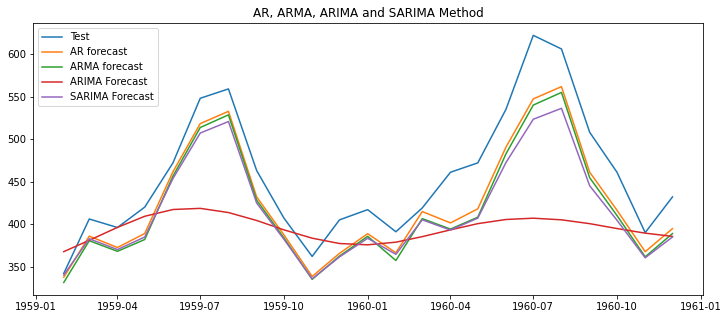

In [80]:
plt.figure(figsize=(12,5))
plt.plot(test_AR['Passengers'], label='Test')
plt.plot(pred_df["Prediction_AR"], label='AR forecast')
plt.plot(pred_df["Prediction_ARMA"], label='ARMA forecast')
plt.plot(pred_df["Prediction_ARIMA"], label='ARIMA Forecast')
plt.plot(pred_df["Prediction_SARIMA"], label='SARIMA Forecast')
plt.legend(loc='best')
plt.title('AR, ARMA, ARIMA and SARIMA Method')
plt.show()

In [81]:
rmse=sqrt(mean_squared_error(test_AR['Passengers'], pred_df["Prediction_SARIMA"]))
print(rmse)

46.744056704639796


In [82]:
pred_df["Residuals_SARIMA"] = test_AR['Passengers'] - pred_df["Prediction_SARIMA"]

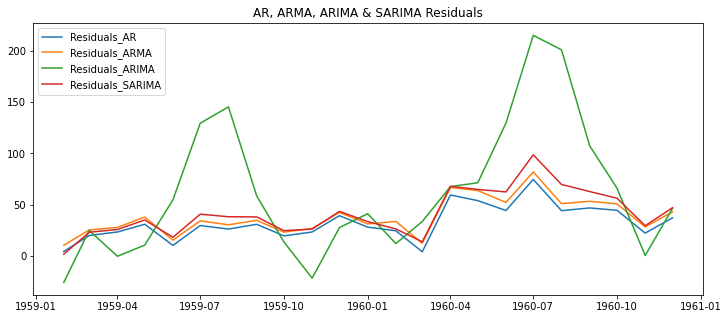

In [83]:
plt.figure(figsize=(12,5))
plt.plot(pred_df["Residuals_AR"], label='Residuals_AR')
plt.plot(pred_df["Residuals_ARMA"], label='Residuals_ARMA')
plt.plot(pred_df["Residuals_ARIMA"], label='Residuals_ARIMA')
plt.plot(pred_df["Residuals_SARIMA"], label='Residuals_SARIMA')
plt.legend(loc='best')
plt.title('AR, ARMA, ARIMA & SARIMA Residuals')
plt.show()

[Go to Index](#0)

<a id='20' style="font-size: 28px">8) ARCH </a>

Autoregressive conditional heteroskedasticity (ARCH) is a statistical model used to analyze volatility in time series in order to forecast future volatility. In the financial world, ARCH modeling is used to estimate risk by providing a model of volatility that more closely resembles real markets. ARCH modeling shows that periods of high volatility are followed by more high volatility and periods of low volatility are followed by more low volatility.

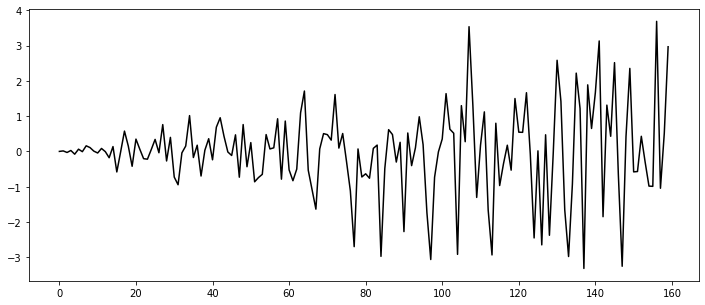

In [84]:
# create a simple white noise with increasing variance
from random import gauss
from random import seed
# seed pseudorandom number generator
seed(16)
# create dataset
data = [gauss(0, i*0.016) for i in range(0,160)]
# plot
plt.figure(figsize=(12,5))
plt.plot(data, color ='black')
plt.show()

<Figure size 864x360 with 0 Axes>

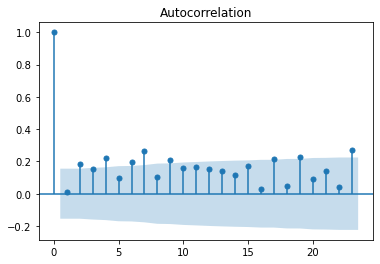

In [85]:
# square the dataset
squared_data = [x**2 for x in data]
# create acf plot
df = pd.DataFrame(squared_data)
plt.figure(figsize=(12,5))
plot_acf(df)
plt.show()

In [86]:
# split into train/test
n_test = 32
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=11)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:     14,   Neg. LLF: 206178.09805320713
Iteration:      2,   Func. Count:     28,   Neg. LLF: 433.51677384276024
Iteration:      3,   Func. Count:     42,   Neg. LLF: 264.70788032348224
Iteration:      4,   Func. Count:     56,   Neg. LLF: 220.66563051780284
Iteration:      5,   Func. Count:     70,   Neg. LLF: 175.71240227536117
Iteration:      6,   Func. Count:     84,   Neg. LLF: 146.6244911340203
Iteration:      7,   Func. Count:     98,   Neg. LLF: 143.30635959768273
Iteration:      8,   Func. Count:    111,   Neg. LLF: 181.6013713463588
Iteration:      9,   Func. Count:    126,   Neg. LLF: 155.3527385176797
Iteration:     10,   Func. Count:    140,   Neg. LLF: 143.00068860677627
Iteration:     11,   Func. Count:    153,   Neg. LLF: 143.05243502568092
Iteration:     12,   Func. Count:    167,   Neg. LLF: 147.23322658108805
Iteration:     13,   Func. Count:    182,   Neg. LLF: 142.96142363948
Iteration:     14,   Func. Count:    195,   Neg. LLF: 142

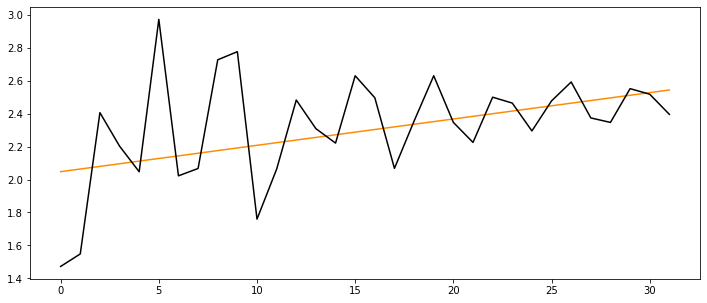

In [87]:
# plot the actual variance
plt.figure(figsize=(12,5))
var = [i*0.016 for i in range(0,160)]
plt.plot(var[-n_test:],color ='darkorange')
# plot forecast variance
plt.plot(yhat.variance.values[-1, :],color ='black')
plt.show()

[Go to Index](#0)

<a id='21' style="font-size: 28px">9) GARCH </a>

Generalized AutoRegressive Conditional Heteroskedasticity (GARCH) is a statistical model used in analyzing time-series data where the variance error is believed to be serially autocorrelated.

In [88]:
# split into train/test
n_test = 32
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=10)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

Iteration:      1,   Func. Count:     14,   Neg. LLF: 518.6301825080377
Iteration:      2,   Func. Count:     28,   Neg. LLF: 1008.2815517969398
Iteration:      3,   Func. Count:     42,   Neg. LLF: 191.6450205222422
Iteration:      4,   Func. Count:     56,   Neg. LLF: 180.62227838449923
Iteration:      5,   Func. Count:     70,   Neg. LLF: 163.77214920233698
Iteration:      6,   Func. Count:     84,   Neg. LLF: 171.3865532486114
Iteration:      7,   Func. Count:     98,   Neg. LLF: 150.70788044899683
Iteration:      8,   Func. Count:    112,   Neg. LLF: 150.3516249320004
Iteration:      9,   Func. Count:    126,   Neg. LLF: 146.05885744700345
Iteration:     10,   Func. Count:    140,   Neg. LLF: 144.33332820797807
Iteration:     11,   Func. Count:    153,   Neg. LLF: 144.29509280122116
Iteration:     12,   Func. Count:    166,   Neg. LLF: 144.28327458381082
Iteration:     13,   Func. Count:    179,   Neg. LLF: 144.28021453418307
Iteration:     14,   Func. Count:    192,   Neg. LLF: 1

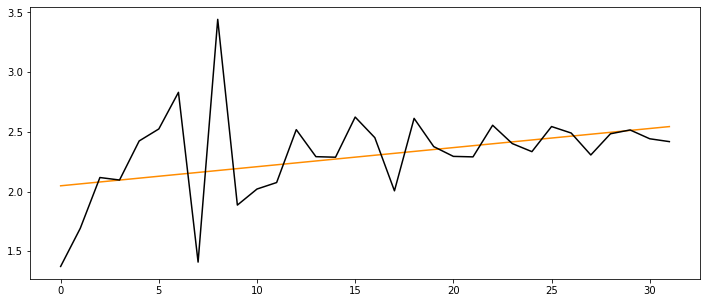

In [89]:
# plot the actual variance
plt.figure(figsize=(12,5))
var = [i*0.016 for i in range(0,160)]
plt.plot(var[-n_test:],color ='darkorange')
# plot forecast variance
plt.plot(yhat.variance.values[-1, :], color ='black')
plt.show()

[Go to Index](#0)

<a id='18' style="font-size: 28px">6) Granger's Causality </a>

It is used to check if one time series is useful for forecasting another

Ho: t2 does not Granger cause t1, the betas associated with t2 are all zero

Ha: t2 Granger causes t1, , not all the betas associated with t2 are zero

Reject Ho if the pvalues are below a desired size of the test

The null hypothesis for all four test is that the coefficients corresponding to past values of the second time series are zero.

In [90]:
# Assumption for this test is ts is stationary
df = pd.read_csv("SeoulBikeData.csv")
df.head()

,Date,RentedBikeCount,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),DewPointTemperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [91]:
df.index = df['Date']
df = df[['DewPointTemperature','Temperature']][:300]

<AxesSubplot:xlabel='Date'>

<Figure size 864x360 with 0 Axes>

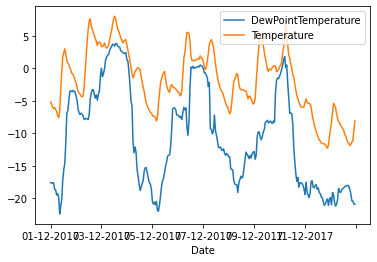

In [92]:
plt.figure(figsize=(12,5))
df.plot()

In [93]:
result = grangercausalitytests(df,maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.5041 , p=0.0001  , df_denom=296, df_num=1
ssr based chi2 test:   chi2=15.6612 , p=0.0001  , df=1
likelihood ratio test: chi2=15.2648 , p=0.0001  , df=1
parameter F test:         F=15.5041 , p=0.0001  , df_denom=296, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.7192  , p=0.0001  , df_denom=293, df_num=2
ssr based chi2 test:   chi2=19.7701 , p=0.0001  , df=2
likelihood ratio test: chi2=19.1420 , p=0.0001  , df=2
parameter F test:         F=9.7192  , p=0.0001  , df_denom=293, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.8896  , p=0.0000  , df_denom=290, df_num=3
ssr based chi2 test:   chi2=24.2401 , p=0.0000  , df=3
likelihood ratio test: chi2=23.3016 , p=0.0000  , df=3
parameter F test:         F=7.8896  , p=0.0000  , df_denom=290, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=6.3595  , p=0.0001  

[Go to Index](#0)

<a id='19' style="font-size: 28px">7) VAR </a>

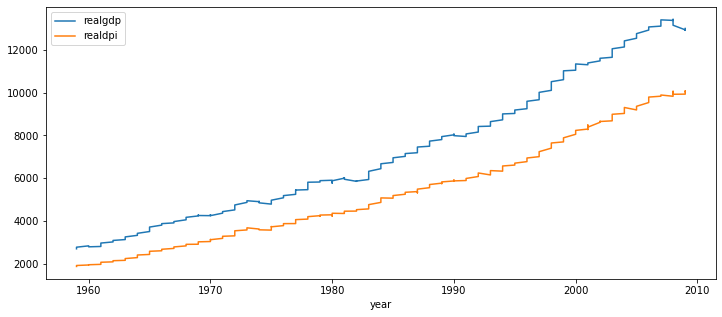

In [94]:
#Load data - US Macro Economic Data from 1959-Q1 to 2009-Q3
data = sm.datasets.macrodata.load_pandas().data
df = data[['realgdp','realdpi']]
df.index = data['year']
df.plot(figsize=(12,5))
plt.show()

In [95]:
#Granger Causality Tests - realdpi granger causes realgdp
result = grangercausalitytests(df,maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0451  , p=0.8320  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=0.0458  , p=0.8306  , df=1
likelihood ratio test: chi2=0.0458  , p=0.8306  , df=1
parameter F test:         F=0.0451  , p=0.8320  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.8221  , p=0.0619  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=5.7882  , p=0.0553  , df=2
likelihood ratio test: chi2=5.7064  , p=0.0577  , df=2
parameter F test:         F=2.8221  , p=0.0619  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.1094  , p=0.0276  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=9.6665  , p=0.0216  , df=3
likelihood ratio test: chi2=9.4402  , p=0.0240  , df=3
parameter F test:         F=3.1094  , p=0.0276  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0785  , p=0.0852  

In [96]:
#reordering the dataframe
#Granger Causality Tests - realgdp granger causes realdpi
result = grangercausalitytests(df[['realdpi','realgdp']],maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.6870 , p=0.0005  , df_denom=199, df_num=1
ssr based chi2 test:   chi2=12.8783 , p=0.0003  , df=1
likelihood ratio test: chi2=12.4844 , p=0.0004  , df=1
parameter F test:         F=12.6870 , p=0.0005  , df_denom=199, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.9020  , p=0.0013  , df_denom=196, df_num=2
ssr based chi2 test:   chi2=14.1562 , p=0.0008  , df=2
likelihood ratio test: chi2=13.6799 , p=0.0011  , df=2
parameter F test:         F=6.9020  , p=0.0013  , df_denom=196, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.6719  , p=0.0132  , df_denom=193, df_num=3
ssr based chi2 test:   chi2=11.4152 , p=0.0097  , df=3
likelihood ratio test: chi2=11.1013 , p=0.0112  , df=3
parameter F test:         F=3.6719  , p=0.0132  , df_denom=193, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.5250  , p=0.0084  

In [97]:
#cointegration test - the null hypothesis:
#no cointegration present between two time series(or no statistically significant relationship between two time series )
ts.coint(df['realgdp'],df['realdpi'])

(-2.8141222651066458,
 0.16123263358242135,
 array([-3.95147899, -3.36654523, -3.0655127 ]))

In [98]:
# Stationarity Test
result = adfuller(df['realgdp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.750463
p-value: 0.998246
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


In [99]:
# Stationarity Test
result = adfuller(df['realdpi'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 2.986025
p-value: 1.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575


In [100]:
df_differenced = df.diff().dropna()

# Stationarity Test
result = adfuller(df_differenced['realgdp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.305696
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575


In [101]:
# Stationarity Test
result = adfuller(df_differenced['realdpi'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.864893
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.575


In [102]:
ts.coint(df_differenced['realgdp'],df_differenced['realdpi'])

(-3.7615343122997786,
 0.015242303649136578,
 array([-3.95175692, -3.36669739, -3.06561782]))

In [103]:
#split series into train and test
df_train, df_test = df_differenced.iloc[:-24,:], df_differenced.iloc[-24:,:]

In [104]:
#Select order(p) of VAR Model
model = VAR(df_train)
for i in range(1,13):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  15.253330565092902
BIC :  15.360996657722524
FPE :  4211532.098226314
HQIC:  15.296995750518047 

Lag Order = 2
AIC :  15.246093656344394
BIC :  15.426234792426108
FPE :  4181264.380914322
HQIC:  15.319158008639867 

Lag Order = 3
AIC :  15.256036057808384
BIC :  15.509218935722265
FPE :  4223275.091967427
HQIC:  15.358734244039441 

Lag Order = 4
AIC :  15.293058687983038
BIC :  15.619857512039712
FPE :  4382997.87310433
HQIC:  15.425628373745333 

Lag Order = 5
AIC :  15.321142710707452
BIC :  15.722139329660926
FPE :  4508550.646171834
HQIC:  15.483824611419514 

Lag Order = 6
AIC :  15.355534953441165
BIC :  15.831319002261802
FPE :  4667399.478833858
HQIC:  15.54857288670057 

Lag Order = 7
AIC :  15.377777828277164
BIC :  15.928946873277631
FPE :  4773937.376707266
HQIC:  15.601418767304892 

Lag Order = 8
AIC :  15.392260872204353
BIC :  16.019420559614407
FPE :  4845699.958392618
HQIC:  15.646755000402328 

Lag Order = 9
AIC :  15.407829569443
BIC :  16.111

In [105]:
#train the VAR model of selected order(p)
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 01, Mar, 2022
Time:                     12:16:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    15.4262
Nobs:                     176.000    HQIC:                   15.3192
Log likelihood:          -1831.12    FPE:                4.18126e+06
AIC:                      15.2461    Det(Omega_mle):     3.95345e+06
--------------------------------------------------------------------
Results for equation realgdp
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             21.524413         6.312670            3.410           0.001
L1.realgdp         0.167117         0.082109            2.035           0.042
L1.realdpi         0.252058         0.094554            2.666         

In [106]:
#checking for correlation of errors using ljung-box test
sm.stats.acorr_ljungbox(model_fitted.resid['realgdp'], lags=2, return_df=True)

,lb_stat,lb_pvalue
1,0.000142,0.990500
2,0.000354,0.999823


In [107]:
sm.stats.acorr_ljungbox(model_fitted.resid['realdpi'], lags=2, return_df=True)

,lb_stat,lb_pvalue
1,0.019225,0.889723
2,0.482073,0.785813


<AxesSubplot:xlabel='year'>

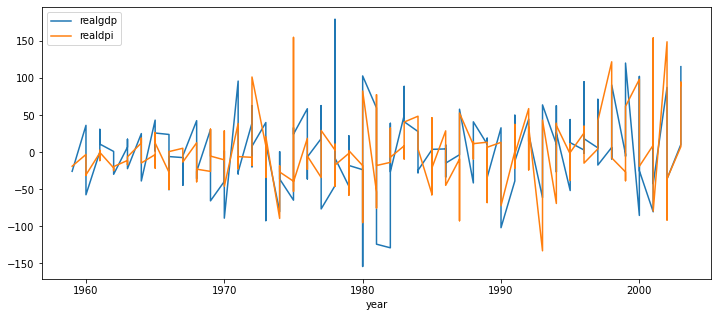

In [108]:
model_fitted.resid.plot(figsize=(12,5))

In [109]:
lagged_values = df_train.values[-2:]
forecast = pd.DataFrame(model_fitted.forecast(y=lagged_values, steps=24), index = df_test.index, 
                        columns = ['realgdp_1d', 'realdpi_1d'])
forecast.head()

,realgdp_1d,realdpi_1d
year,,
2003.0,111.292342,73.854739
2004.0,104.164090,63.861450
2004.0,80.987628,55.419263
2004.0,73.002835,49.551203
2004.0,65.206673,46.730919


In [110]:
#Transforming to Original Forecast

forecast["realgdp_forecasted"] = df["realgdp"].iloc[-24-1] + forecast['realgdp_1d'].cumsum()
forecast["realdpi_forecasted"] = df["realdpi"].iloc[-24-1] + forecast['realdpi_1d'].cumsum() 

forecast.head()

,realgdp_1d,realdpi_1d,realgdp_forecasted,realdpi_forecasted
year,,,,
2003.0,111.292342,73.854739,12046.753342,9009.254739
2004.0,104.164090,63.861450,12150.917432,9073.116189
2004.0,80.987628,55.419263,12231.905060,9128.535452
2004.0,73.002835,49.551203,12304.907896,9178.086655
2004.0,65.206673,46.730919,12370.114568,9224.817575


In [111]:
#Actual vs Predicted - RealGDP
realgdp_pred = pd.DataFrame()
realgdp_pred['actual'] = df.iloc[-24:,0]
realgdp_pred['predicted'] = forecast['realgdp_forecasted']

#Performance metric
print('RMSE of realgdp: ',sqrt(mean_squared_error(realgdp_pred['actual'],realgdp_pred['predicted'])))

RMSE of realgdp:  238.76366987927935


In [112]:
#Actual vs Predicted - RealDPI
realdpi_pred = pd.DataFrame()
realdpi_pred['actual'] = df.iloc[-24:,1]
realdpi_pred['predicted'] = forecast['realdpi_forecasted']

#Performance metric
print('RMSE of realdpi: ',sqrt(mean_squared_error(realdpi_pred['actual'],realdpi_pred['predicted'])))

RMSE of realdpi:  124.04297563234586


[Go to Index](#0)

<a id='22' style="font-size: 28px">10) Partial F-test </a>

Ho: All coefficients removed from the full model are zero.

Ha: At least one of the coefficients removed from the full model is non-zero.

In [113]:
import os
os.getcwd()
from scipy import stats
import pandas as pd
import statsmodels.api as sm

In [114]:
df = pd.read_csv("data.csv")
df.head()

,x1,x2,x3,x4,x5,y
0,0.803428,0.527522,0.119111,0.639681,0.090925,0.332226
1,0.427381,0.554386,0.628127,0.697393,0.789950,0.131890
2,0.342770,0.201560,0.707324,0.033399,0.909250,0.405161
3,0.760435,0.473758,0.286719,0.751292,0.097090,0.412358
4,0.281639,0.390278,0.871109,0.081245,0.557931,0.547534


In [115]:
X = df.drop('y',axis=1)
y = df.y
X = sm.add_constant(X)
X.head()

,const,x1,x2,x3,x4,x5
0,1.0,0.803428,0.527522,0.119111,0.639681,0.090925
1,1.0,0.427381,0.554386,0.628127,0.697393,0.789950
2,1.0,0.342770,0.201560,0.707324,0.033399,0.909250
3,1.0,0.760435,0.473758,0.286719,0.751292,0.097090
4,1.0,0.281639,0.390278,0.871109,0.081245,0.557931


In [116]:
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.616
Date:                Tue, 01 Mar 2022   Prob (F-statistic):              0.176
Time:                        12:16:51   Log-Likelihood:                -4.4215
No. Observations:                  50   AIC:                             20.84
Df Residuals:                      44   BIC:                             32.32
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7432      0.201      3.700      0.001       0.338       1.148
x1            -0.0345      0.147     -0.235      0.816      -0.331       0.262
x2            -0.1758      0.151     -1.165      0.250      -0.480       0.128
x3            -0.1472      0.150     -0.982      0.331      -0.449       0.155
x4            -0.2735      0.144     -1.905      0.063      -0.563       0.016
x5             0.1143      0.135      0.845      0.403      -0.158       0.387
==============================================================================
Omnibus:                        1.902   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.386   Jarque-Bera (JB):                1.259
Skew:                           0.077   Prob(JB):                        0.533
Kurtosis:                       2.238   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
SSEF = sum((y - results.predict(X))**2)
SSEF

3.4938516065731045

In [118]:
Xr = X.drop(['x3','x4'], axis=1)
Xr.head()

,const,x1,x2,x5
0,1.0,0.803428,0.527522,0.090925
1,1.0,0.427381,0.554386,0.789950
2,1.0,0.342770,0.201560,0.909250
3,1.0,0.760435,0.473758,0.097090
4,1.0,0.281639,0.390278,0.557931


In [119]:
resultsr = sm.OLS(y,Xr).fit()
resultsr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.8699
Date:                Tue, 01 Mar 2022   Prob (F-statistic):              0.464
Time:                        12:16:51   Log-Likelihood:                -7.2559
No. Observations:                  50   AIC:                             22.51
Df Residuals:                      46   BIC:                             30.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4801      0.168      2.855      0.006       0.142       0.819
x1            -0.0150      0.151     -0.099      0.922      -0.320       0.290
x2            -0.1421      0.155     -0.914      0.365      -0.455       0.171
x5             0.1709      0.137      1.250      0.218      -0.104       0.446
==============================================================================
Omnibus:                        8.481   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.654
Skew:                           0.089   Prob(JB):                        0.265
Kurtosis:                       1.885   Cond. No.                         8.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
SSEr = sum((y - resultsr.predict(Xr))**2)
SSEr

3.9133040852588503

In [121]:
k = 5
r = 3
n = df.shape[0]

In [122]:
num = (SSEr - SSEF)/(k-r)
denom = SSEF / (n-k-1)
Fstat = num / denom
Fstat

2.641198187617796

In [123]:
stats.f.sf(Fstat,k-r,n-k-1)

0.08255414803527948

In [124]:
hypotheses = '(x3 = 0), (x4 = 0)'
f_test = results.f_test(hypotheses)
print(f_test)

<F test: F=array([[2.64119819]]), p=0.08255414803527948, df_denom=44, df_num=2>


[Go to Index](#0)